---
# PfDA Project 2
---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import json
import csv
# Other libraries if needed
# import statsmodels
# import datetime
# import requests


---
# **Introduction**
---

This project aims to delve into a comprehensive examination of climate data across an extensive timeline, ranging from 800,000 years ago to the present day. The analysis primarily focuses on establishing correlations between CO2 levels and temperature anomalies while also exploring changes in polar ice coverage as a key variable. This research also seeks to investigate climate change signals within the context of Ireland's meteorological observations and harnesses data fusion techniques to amalgamate multiple datasets into a structured pandas dataframe.

## Project Overview
This project involves an intricate series of steps, encompassing data collection from reputable sources, integration of diverse datasets into a coherent framework, exploratory data analysis to uncover trends and relationships, and predictive modeling techniques to forecast future global temperature anomalies. Additionally, the study entails the comparison of these predictions with established climate models, intending to shed light on potential accelerated warming trends observed in recent climate features.

## Objectives and Goals
The primary objective of this research is to perform an in-depth analysis of climate data, investigating the relationship between CO2 levels and temperature anomalies while exploring related variables. The specific goals include the examination of Irish climate change signals, prediction of future global temperature anomalies, and the comparison of these predictions with established climate models.

## Scope and Limitations
The scope of this study encompasses the analysis of climate data spanning an extensive timeframe, incorporating various datasets to establish correlations and predict future temperature anomalies. However, certain limitations exist, including the potential constraints in data availability or accuracy, complexities in predictive modeling, and the inherent uncertainties associated with long-term climate predictions.

---
# Extraction
---

## Temperature

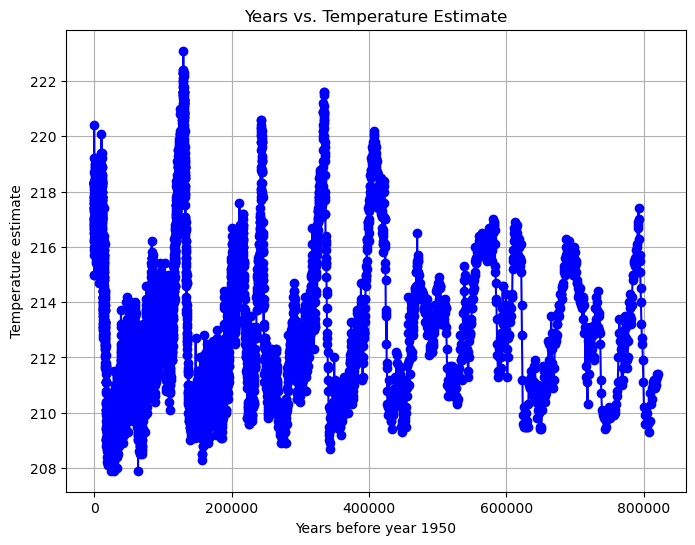

In [2]:
file_path1 = './data/temp/epicaDC.deuttemp.EDC3-AICC.csv'
df1 = pd.read_csv(file_path1)

# Extracting columns 3 (EDC3 age scale) and 5 (Temperature estimate)
edc3_age = df1['EDC3béta']
temperature_estimate = df1['temp']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue')
plt.xlabel('Years before year 1950')
plt.ylabel('Temperature estimate')
plt.title('Years vs. Temperature Estimate')
plt.grid(True)
plt.show()

## CO2

In [3]:
# Read the text file with tab-separated values
#df = pd.read_csv('./data/co2/grl52461-sup-0003-supplementary.txt', delimiter='\t', skiprows=28)

# Save the DataFrame to a CSV file
#df.to_csv('./data/co2/converted_co2_data.csv', index=False)

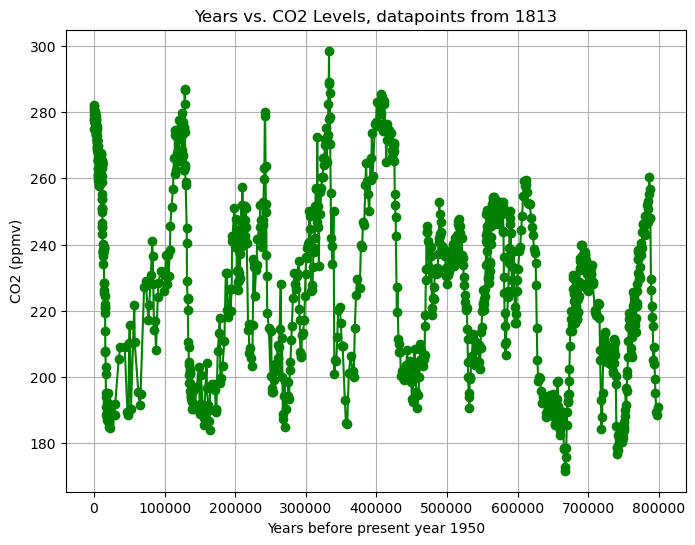

In [4]:
file_path2 = './data/co2/41586_2008_BFnature06949_MOESM31_ESM.xlsx'
df2 = pd.read_excel(file_path2, skiprows=6, sheet_name='3.  Composite CO2')

# Handling NaN values (if any)
df2.dropna(subset=['EDC3_gas_a (yr)', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
years = df2['EDC3_gas_a (yr)']
co2 = df2['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(years, co2, marker='o', linestyle='-', color='green')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, datapoints from 1813')
plt.grid(True)
plt.show()

The above data has the first data point in years as being 137 years Before Present(BP), with BP being 1950. In the below data, the year values in the first column commence at -51 years BP, which would put the year as 2001.

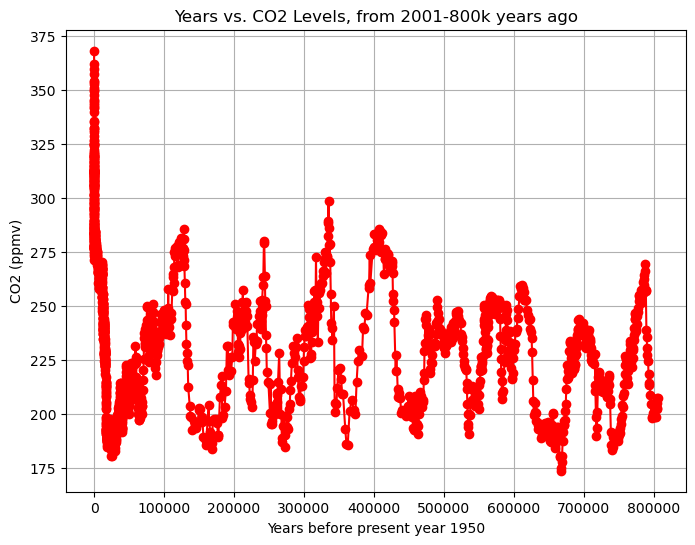

In [5]:
file_path3 = './data/co2/grl52461-sup-0003-supplementary.xlsx'
df3 = pd.read_excel(file_path3, skiprows=14, sheet_name='CO2 Composite')

# Handling NaN values (if any)
df3.dropna(subset=['Gasage (yr BP) ', 'CO2 (ppmv)'], inplace=True)

# Extract data from the first two columns
Gasage = df3['Gasage (yr BP) ']
co22 = df3['CO2 (ppmv)']

# Plotting the extracted data with the same formatting
plt.figure(figsize=(8, 6))
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red')
plt.xlabel('Years before present year 1950')
plt.ylabel('CO2 (ppmv)')
plt.title('Years vs. CO2 Levels, from 2001-800k years ago')
plt.grid(True)
plt.show()

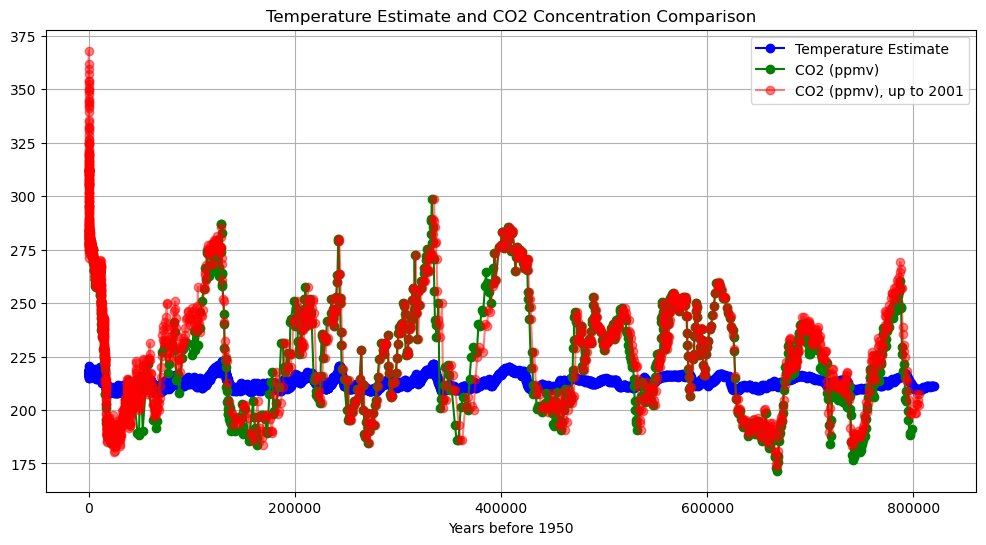

In [6]:
# Plotting both sets of data on the same graph
plt.figure(figsize=(12, 6))

# Plotting the first dataset
plt.plot(edc3_age, temperature_estimate, marker='o', linestyle='-', color='blue', label='Temperature Estimate')

# Plotting the second dataset
plt.plot(years, co2, marker='o', linestyle='-', color='green', label='CO2 (ppmv)')

# Plotting the third dataset
plt.plot(Gasage, co22, marker='o', linestyle='-', color='red', label='CO2 (ppmv), up to 2001', alpha=0.5)

plt.xlabel('Years before 1950')
plt.grid(True)
plt.legend()
plt.title('Temperature Estimate and CO2 Concentration Comparison')
plt.show()

## Ice

The simulated ice data was gathered from the [NOAA](https://www.ncei.noaa.gov/access/paleo-search/) website.
A search entered as below will yield the original data set.
> Global 5 Million Year Sea Level, Temperature, and d18Osw Reconstructions
https://www.ncei.noaa.gov/pub/data/paleo/reconstructions/deboer2014/deboer2014.txt

In [7]:
# Read the text file with tab-separated values and replace -999 with NaN
file_path_txt = './data/ice/deboer2014.txt'
df = pd.read_csv(file_path_txt, delimiter='\t', na_values=-999, skiprows=114)

# Save the DataFrame to a CSV file
file_path_csv = './data/ice/generated/converted_icedata.csv'
df.to_csv(file_path_csv, index=False)

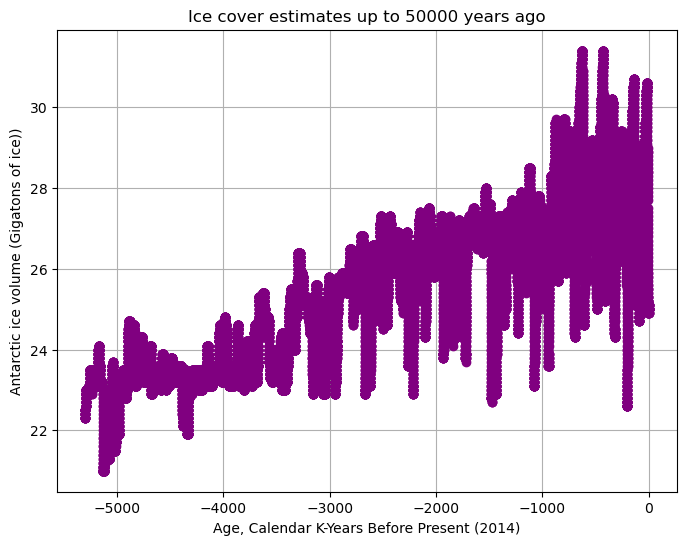

In [8]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('./data/ice/generated/converted_icedata.csv')

# Extract data from the first column and 'AnIS-V' column
year = df['age_calkaBP']
ice_volume = df['AnIS-V']

# Plotting the extracted data
plt.figure(figsize=(8, 6))
plt.plot(year, ice_volume,  marker='o', linestyle='-', color='purple')
plt.xlabel('Age, Calendar K-Years Before Present (2014)')  
plt.ylabel('Antarctic ice volume (Gigatons of ice))')  
plt.title('Ice cover estimates up to 50000 years ago')
plt.grid(True)
plt.show()


## Ireland

Irish rainfall data from 1711 - 2016 gathered from MET [Éireann](https://www.met.ie/climate/available-data/long-term-data-sets/#MonthlyIIP), understanding gathered from this journal [article](https://cp.copernicus.org/articles/14/413/2018/) from Maynooth University.

This data shows the median monthly rainfall data for each month from the year 1711 - 2016. The data is a composite of many different data points taken from different weather stations throughout the given time period.

In [9]:
rain = pd.read_csv('./data/ireland/IOI_1711_SERIES.CSV')

print(rain.head())

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6


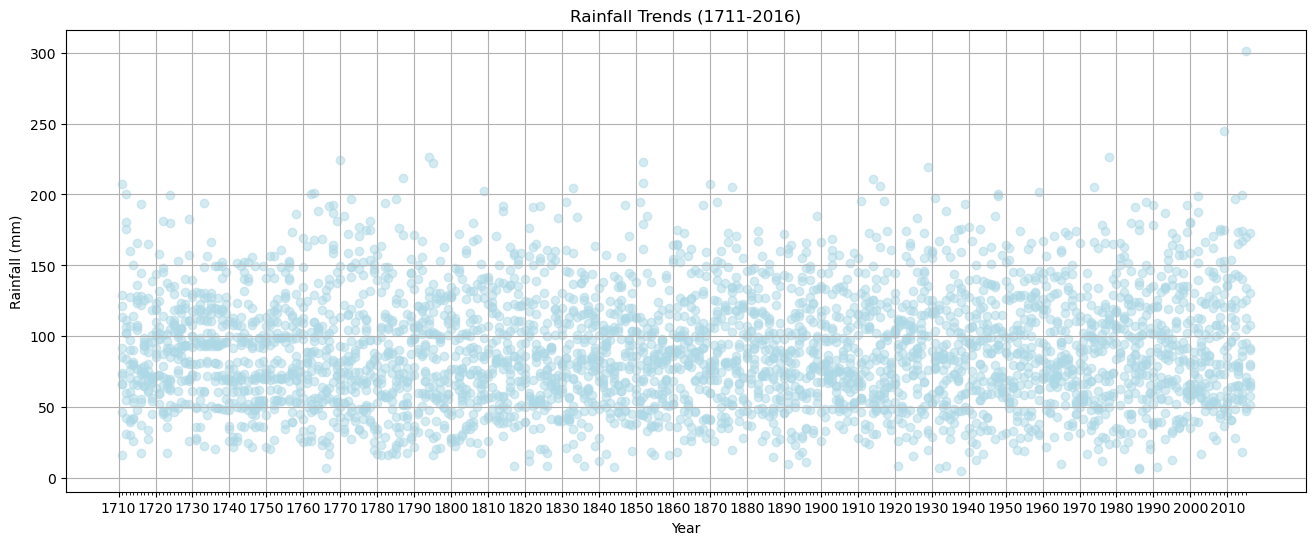

In [31]:
# Create a figure and axis
plt.figure(figsize=(16, 6))
ax = plt.gca()

# Plotting the data as individual points
plt.scatter(rain['Year'], rain['Median montly series'], color='lightblue', alpha=0.5)

# Set x-axis major ticks every 10 years
major_ticks = range(1710, 2017, 10)
ax.set_xticks(major_ticks)

# Set minor ticks between major ticks
minor_ticks = range(1711, 2016, 1)
ax.set_xticks(minor_ticks, minor=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trends (1711-2016)')

# Show grid and plot
plt.grid(True)
plt.show()

# EDA

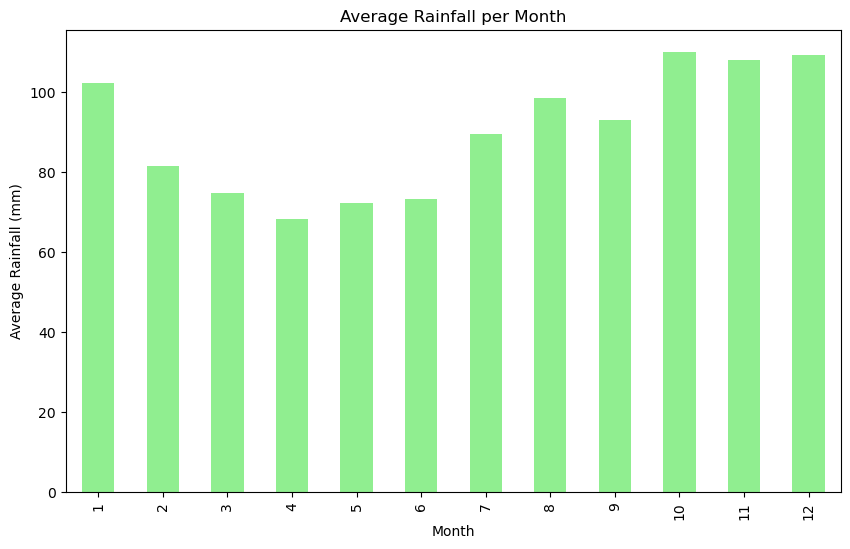

In [32]:
# Aggregating rainfall for each month
monthly_rainfall = rain.groupby('Month')['Median montly series'].mean()

# Plotting a bar plot for monthly rainfall
plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='bar', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per Month')
plt.show()

In [33]:
# # Calculate yearly median rainfall values
yearly_rainfall = rain.groupby('Year')['Median montly series'].median().reset_index()

# # Display the first and last rows of the yearly rainfall data
print(yearly_rainfall.head())

print(yearly_rainfall.tail())

   Year  Median montly series
0  1711                 79.70
1  1712                102.70
2  1713                 78.60
3  1714                 72.95
4  1715                107.55
     Year  Median montly series
301  2012                103.70
302  2013                 77.15
303  2014                 92.10
304  2015                100.15
305  2016                 79.80


### Aggregating timeseries data to examine the rainfall data

By aggregating the data, it becomes possible to observe the broader trend of rainfall over the span of the entire dataset.

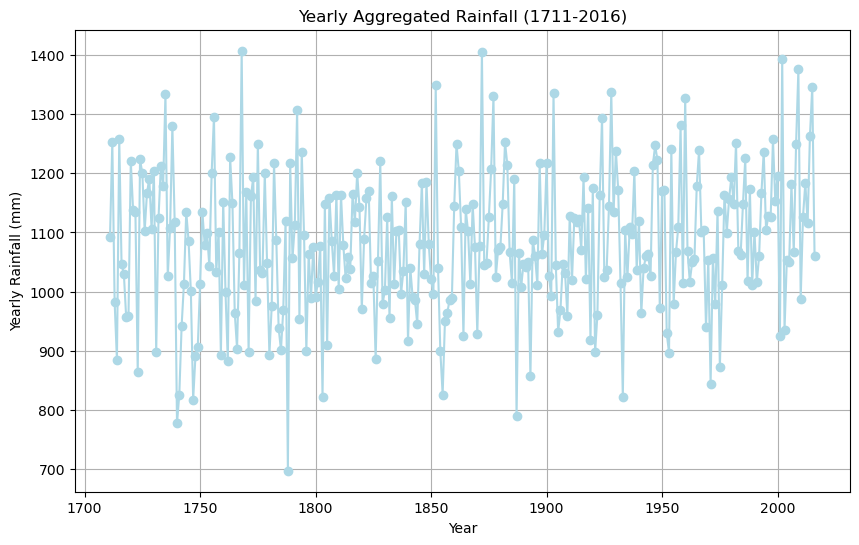

In [34]:
# Convert 'Year' and 'Month' columns to datetime
rain['Date'] = pd.to_datetime(rain[['Year', 'Month']].assign(day=1))

# Group by year and sum the rainfall for each year
yearly_rainfall = rain.groupby(rain['Date'].dt.year)['Median montly series'].sum()

# Plot the aggregated yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title('Yearly Aggregated Rainfall (1711-2016)')
plt.grid(True)
plt.show()

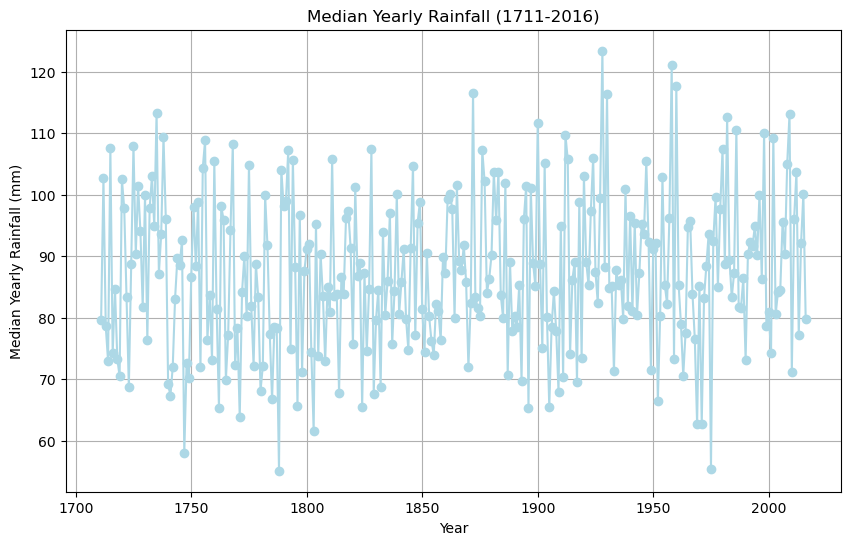

In [35]:
# Convert 'Year' and 'Month' columns to datetime
rain['Date'] = pd.to_datetime(rain[['Year', 'Month']].assign(day=1))

# Calculate median yearly rainfall
yearly_median_rainfall = rain.groupby(rain['Date'].dt.year)['Median montly series'].median()

# Plot the median yearly rainfall data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_rainfall.index, yearly_median_rainfall.values, marker='o', linestyle='-', color='lightblue')
plt.xlabel('Year')
plt.ylabel('Median Yearly Rainfall (mm)')
plt.title('Median Yearly Rainfall (1711-2016)')
plt.grid(True)
plt.show()


Creating a yearly rainfall dataset

In [36]:
yearly_rainfall_dataset = yearly_rainfall.reset_index()
yearly_rainfall_dataset.columns = ['Year', 'Rainfall']

# write to a new csv file
yearly_rainfall_dataset.to_csv('./data/ireland/generated/yearly_totalrainfall.csv', index=False)

In [37]:
yearly_median_rainfall_dataset = yearly_median_rainfall.reset_index()
yearly_median_rainfall_dataset.columns = ['Year', 'Median rainfall']

# write to a new csv file
yearly_median_rainfall_dataset.to_csv('./data/ireland/generated/yearly_medianrainfall.csv', index=False)

## Reductions/Transformations

before filtering this data. it is important to consider that the data in the other datasets is arranged on a different time scale, using BP and up to 800000 years before that 

In [38]:
# Filter temperature data
filtered_temperature = df1[(df1['Year'] >= 1700) & (df1['Year'] <= 2016)]
'Gasage (yr BP) ''EDC3béta'
# Filter CO2 data
filtered_co2 = df3[(df3['Year'] >= 1700) & (df3['Year'] <= 2016)]

KeyError: 'Year'

---
# **Conclusions**
---

---
# **References**
---

---
# End